<a href="https://colab.research.google.com/github/chinnusai25/cvit-Workshop2020/blob/master/Day4(May29).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Morning Session**<br>
**Panorama And Feature Matching**

Capture a wide view by joining images = Panorama = Wide angle View<br>
We will consider some features in both the images and if they match then the both objects are same = **Object Detection** <br>
Key point=point location of the features<br>
K nearest neighbour matching algo<br>

In [21]:
!pip uninstall opencv-python -y
# downgrade OpenCV a bit since some none-free features are not avilable
!pip install opencv-contrib-python==3.4.2.17 --force-reinstall

Uninstalling opencv-python-4.1.2.30:
  Successfully uninstalled opencv-python-4.1.2.30
     |████████████████████████████████| 30.6MB 135kB/s 
     |████████████████████████████████| 20.2MB 2.5MB/s 
ERROR: imgaug 0.2.9 requires opencv-python, which is not installed.
ERROR: dopamine-rl 1.0.5 requires opencv-python>=3.4.1.15, which is not installed.
ERROR: albumentations 0.1.12 requires opencv-python, which is not installed.
ERROR: datascience 0.10.6 has requirement folium==0.2.1, but you'll have folium 0.8.3 which is incompatible.
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.
  Found existing installation: numpy 1.18.4
    Uninstalling numpy-1.18.4:
      Successfully uninstalled numpy-1.18.4
  Found existing installation: opencv-contrib-python 4.1.2.30
    Uninstalling opencv-contrib-python-4.1.2.30:
      Successfully uninstalled opencv-contrib-python-4.1.2.30


In [0]:
import numpy as np
import cv2
from google.colab.patches import cv2_imshow
from matplotlib import pyplot as plt
import plotly
from skimage import io
from skimage import morphology as morp
import plotly.express as px
import plotly.graph_objects as go

In [0]:
image1=cv2.imread('/content/box.png',cv2.IMREAD_GRAYSCALE)
image2=cv2.imread('/content/box_in_scene.png',cv2.IMREAD_GRAYSCALE)

In [0]:
# Initiate Sift detector
sift =cv2.xfeatures2d.SIFT_create()
kp1, des1 = sift.detectAndCompute(image1,None)
kp2, des2 = sift.detectAndCompute(image2,None)
#kp=keypoint,des=descriptors
# here we selected kp randomly but when we deal with image we decide the kp

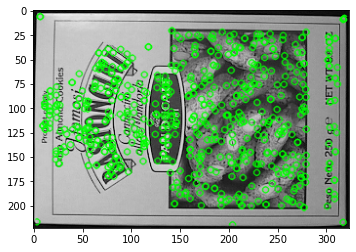

In [9]:
plt.imshow(cv2.drawKeypoints(image1,kp1,None,color=(0,255,0)))

In [0]:
I = cv2.imread("/content/box.png",cv2.IMREAD_GRAYSCALE)
# cv2.imshow(I)
res=[]
for i in range(3):
  for j in range (3):
    res.append(I[14+i][14+j])
print(I[14][14],I[14][15],I[14][16])
print(res)
cv2_imshow(np.hstack([I]))
# Intensity descriptors for key point (15,15) = res
# descriptors have the info about where key points are present
# keypoint = location of feature

Text(0.5, 0, '(b)')

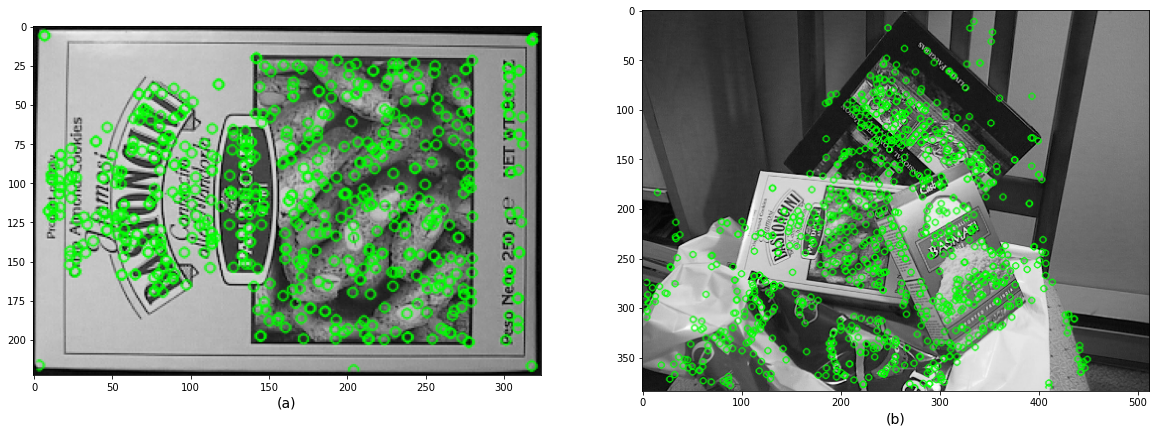

In [10]:
# display the keypoints and features detected on both images
fig, (ax1,ax2) = plt.subplots(nrows=1, ncols=2, figsize=(20,8), constrained_layout=False)
ax1.imshow(cv2.drawKeypoints(image1,kp1,None,color=(0,255,0)))
ax1.set_xlabel("(a)", fontsize=14)
ax2.imshow(cv2.drawKeypoints(image2,kp2,None,color=(0,255,0)))
ax2.set_xlabel("(b)", fontsize=14)

1505


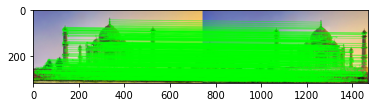

In [31]:
match = cv2.BFMatcher()
matches = match.knnMatch(des1,des2,k=2)
#matches = sir are u saying something like the neighbours of a pixel in img1 gets compared with the neighbours of all pixels in second img
print(len(matches))
good = []
for m,n in matches:
    if m.distance < 0.7*n.distance:
        good.append(m)

draw_params = dict(matchColor=(0,255,0),
                       singlePointColor=None,
                       flags=2)

img3 = cv2.drawMatches(image1,kp1,image2,kp2,good,None,**draw_params)
plt.imshow(img3)
#so is it like pts a, b matched to c, d. so m.distance = AB and n.distance = cd

In [0]:
image1=cv2.imread('/content/img2_2.png')
image2=cv2.imread('/content/img2_1.png')

image1_gray=cv2.cvtColor(image1,cv2.COLOR_BGR2GRAY)
image2_gray=cv2.cvtColor(image2,cv2.COLOR_BGR2GRAY)

image1=cv2.cvtColor(image1,cv2.COLOR_BGR2RGB)
image2=cv2.cvtColor(image2,cv2.COLOR_BGR2RGB)

In [0]:
# find the keypoints and descriptors with ORB
orb = cv2.ORB_create()

kp1, des1 = orb.detectAndCompute(image1_gray,None)
kp2, des2 = orb.detectAndCompute(image2_gray,None)

In [0]:
# Initiate Sift detector
sift =cv2.xfeatures2d.SIFT_create()
kp1, des1 = sift.detectAndCompute(image1_gray,None)
kp2, des2 = sift.detectAndCompute(image2_gray,None)

Text(0.5, 0, '(b)')

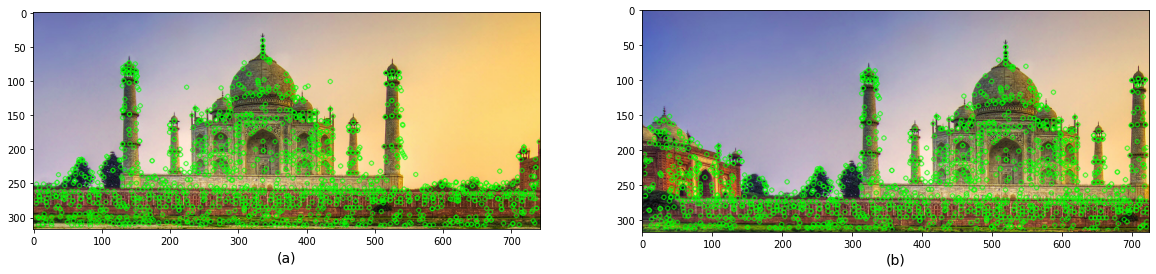

In [15]:
# display the keypoints and features detected on both images
fig, (ax1,ax2) = plt.subplots(nrows=1, ncols=2, figsize=(20,8), constrained_layout=False)
ax1.imshow(cv2.drawKeypoints(image1,kp1,None,color=(0,255,0)))
ax1.set_xlabel("(a)", fontsize=14)
ax2.imshow(cv2.drawKeypoints(image2,kp2,None,color=(0,255,0)))
ax2.set_xlabel("(b)", fontsize=14)

**EXCERCISE**
Add the results and observation for the three textures:<br>
Images captured by your phone of any view. <br>
Homogeneous or a simple flat patch with uniform color (may be a pic of your <br>wall).
Images containing the source of light (pic of sun  or your tubelight.)<br>
Images taken by low light vision (pics clicked in a dark room)<br>


6084


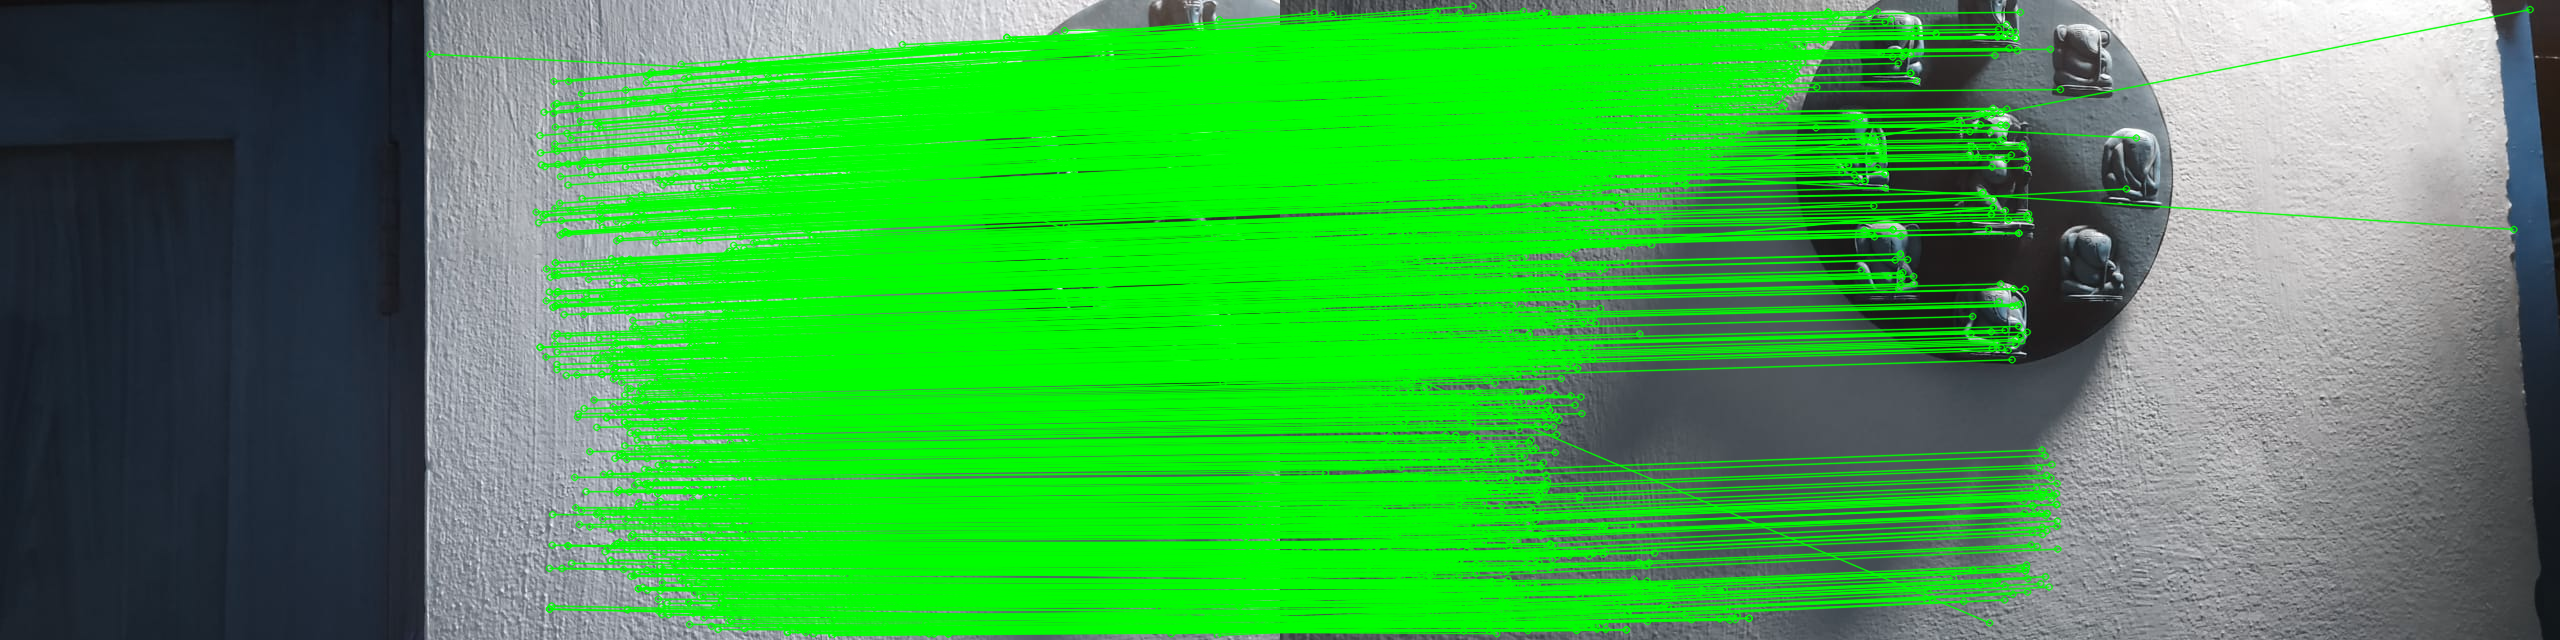

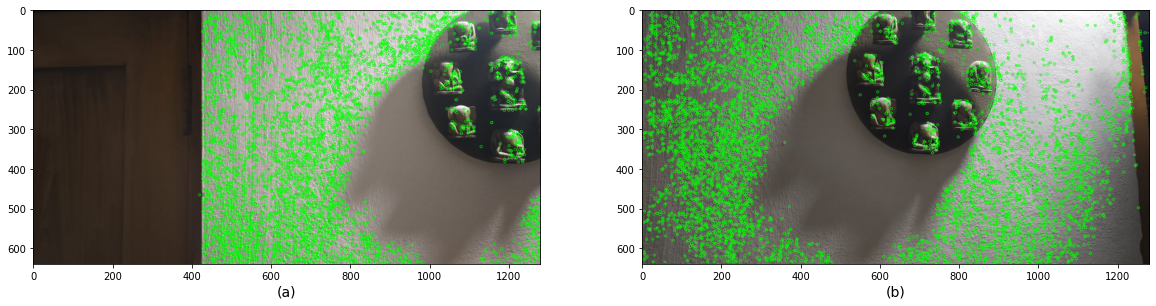

In [20]:
image1=cv2.imread('/content/wall_left.jpeg')
image2=cv2.imread('/content/wall_right.jpeg')

image1_gray=cv2.cvtColor(image1,cv2.COLOR_BGR2GRAY)
image2_gray=cv2.cvtColor(image2,cv2.COLOR_BGR2GRAY)

image1=cv2.cvtColor(image1,cv2.COLOR_BGR2RGB)
image2=cv2.cvtColor(image2,cv2.COLOR_BGR2RGB)

# find the keypoints and descriptors with ORB
orb = cv2.ORB_create()

kp1, des1 = orb.detectAndCompute(image1_gray,None)
kp2, des2 = orb.detectAndCompute(image2_gray,None)

# Initiate Sift detector
sift =cv2.xfeatures2d.SIFT_create()
kp1, des1 = sift.detectAndCompute(image1_gray,None)
kp2, des2 = sift.detectAndCompute(image2_gray,None)

# display the keypoints and features detected on both images
fig, (ax1,ax2) = plt.subplots(nrows=1, ncols=2, figsize=(20,8), constrained_layout=False)
ax1.imshow(cv2.drawKeypoints(image1,kp1,None,color=(0,255,0)))
ax1.set_xlabel("(a)", fontsize=14)
ax2.imshow(cv2.drawKeypoints(image2,kp2,None,color=(0,255,0)))
ax2.set_xlabel("(b)", fontsize=14)

match = cv2.BFMatcher()
matches = match.knnMatch(des1,des2,k=2)
#matches = sir are u saying something like the neighbours of a pixel in img1 gets compared with the neighbours of all pixels in second img
print(len(matches))
good = []
for m,n in matches:
    if m.distance < 0.7*n.distance:
        good.append(m)

draw_params = dict(matchColor=(0,255,0),
                       singlePointColor=None,
                       flags=2)

img3 = cv2.drawMatches(image1,kp1,image2,kp2,good,None,**draw_params)
# plt.imshow(img3)
cv2_imshow(img3)
#so is it like pts a, b matched to c, d. so m.distance = AB and n.distance = cd

The above image is of wall and we can observe a lot of match points since the whole wall plane looks alike and also they got improperly matched since all the pixels look alike

706


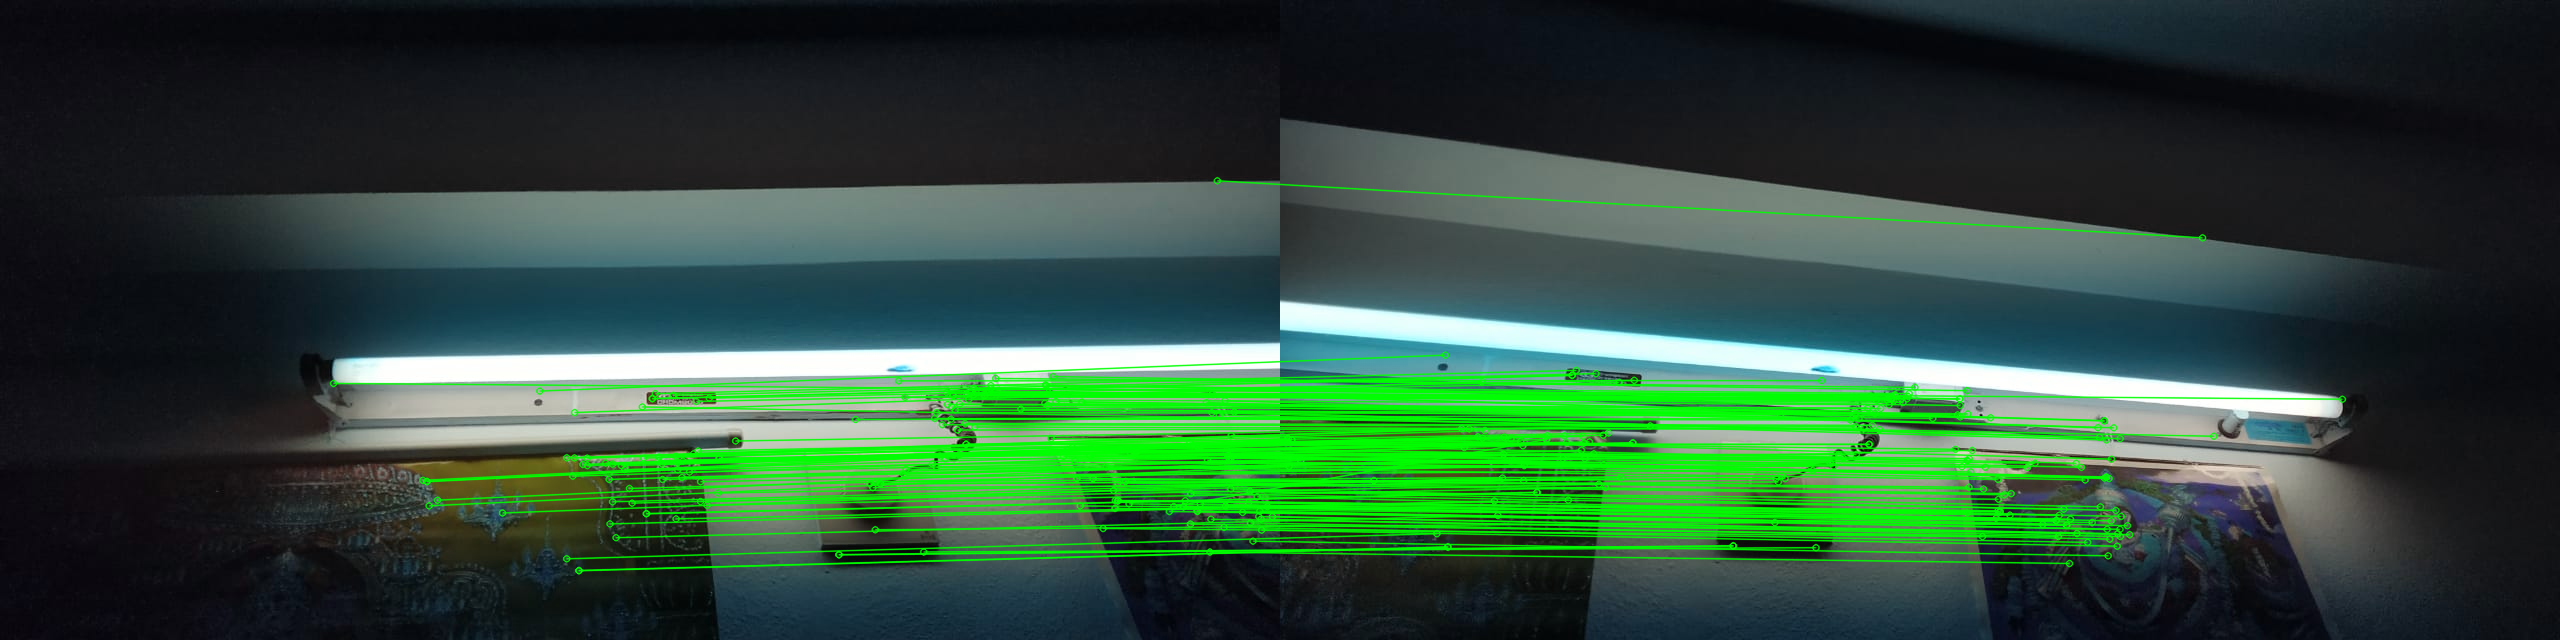

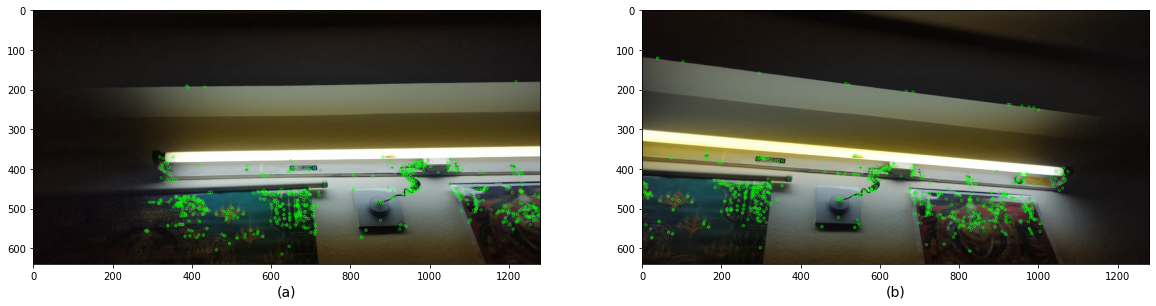

In [23]:
image1=cv2.imread('/content/dark_left.jpeg')
image2=cv2.imread('/content/dark_right.jpeg')

image1_gray=cv2.cvtColor(image1,cv2.COLOR_BGR2GRAY)
image2_gray=cv2.cvtColor(image2,cv2.COLOR_BGR2GRAY)

image1=cv2.cvtColor(image1,cv2.COLOR_BGR2RGB)
image2=cv2.cvtColor(image2,cv2.COLOR_BGR2RGB)

# find the keypoints and descriptors with ORB
orb = cv2.ORB_create()

kp1, des1 = orb.detectAndCompute(image1_gray,None)
kp2, des2 = orb.detectAndCompute(image2_gray,None)

# Initiate Sift detector
sift =cv2.xfeatures2d.SIFT_create()
kp1, des1 = sift.detectAndCompute(image1_gray,None)
kp2, des2 = sift.detectAndCompute(image2_gray,None)

# display the keypoints and features detected on both images
fig, (ax1,ax2) = plt.subplots(nrows=1, ncols=2, figsize=(20,8), constrained_layout=False)
ax1.imshow(cv2.drawKeypoints(image1,kp1,None,color=(0,255,0)))
ax1.set_xlabel("(a)", fontsize=14)
ax2.imshow(cv2.drawKeypoints(image2,kp2,None,color=(0,255,0)))
ax2.set_xlabel("(b)", fontsize=14)

match = cv2.BFMatcher()
matches = match.knnMatch(des1,des2,k=2)
#matches = sir are u saying something like the neighbours of a pixel in img1 gets compared with the neighbours of all pixels in second img
print(len(matches))
good = []
for m,n in matches:
    if m.distance < 0.7*n.distance:
        good.append(m)

draw_params = dict(matchColor=(0,255,0),
                       singlePointColor=None,
                       flags=2)

img3 = cv2.drawMatches(image1,kp1,image2,kp2,good,None,**draw_params)
# plt.imshow(img3)
cv2_imshow(img3)
#so is it like pts a, b matched to c, d. so m.distance = AB and n.distance = cd

The above was of the light image we can observe match points below the light but not on the surface of light, this might be because of high intensity of light.

0


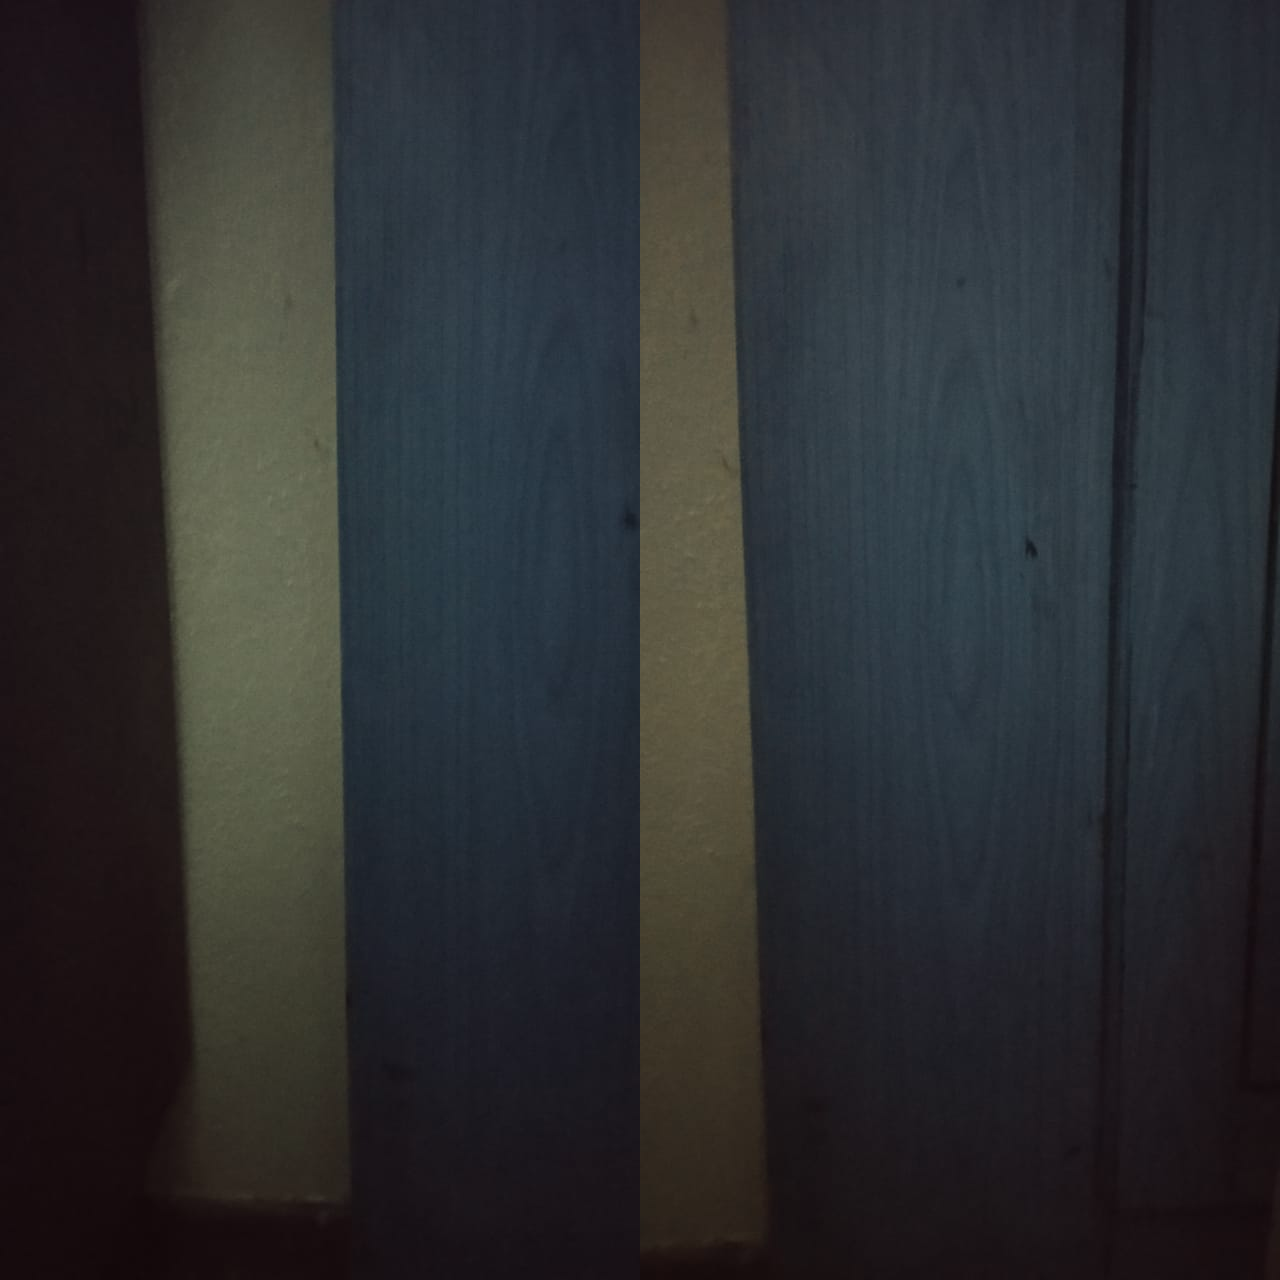

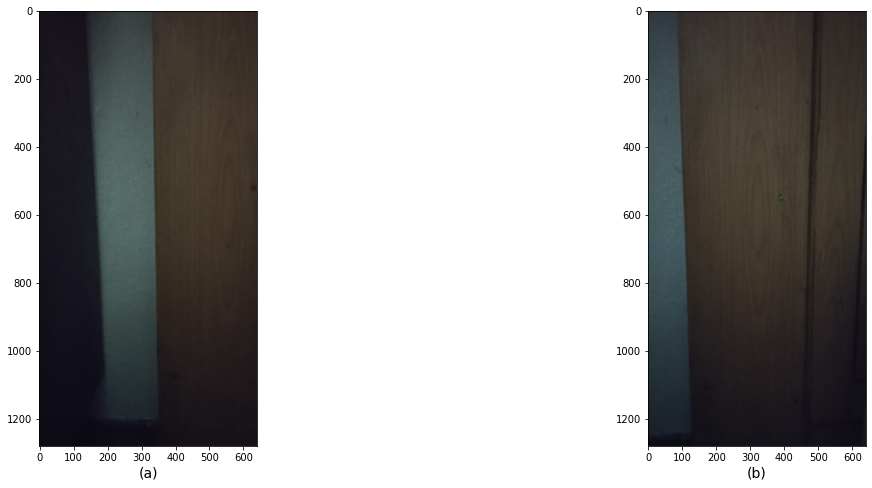

In [24]:
image1=cv2.imread('/content/DARK_left.jpeg')
image2=cv2.imread('/content/DARK_right.jpeg')

image1_gray=cv2.cvtColor(image1,cv2.COLOR_BGR2GRAY)
image2_gray=cv2.cvtColor(image2,cv2.COLOR_BGR2GRAY)

image1=cv2.cvtColor(image1,cv2.COLOR_BGR2RGB)
image2=cv2.cvtColor(image2,cv2.COLOR_BGR2RGB)

# find the keypoints and descriptors with ORB
orb = cv2.ORB_create()

kp1, des1 = orb.detectAndCompute(image1_gray,None)
kp2, des2 = orb.detectAndCompute(image2_gray,None)

# Initiate Sift detector
sift =cv2.xfeatures2d.SIFT_create()
kp1, des1 = sift.detectAndCompute(image1_gray,None)
kp2, des2 = sift.detectAndCompute(image2_gray,None)

# display the keypoints and features detected on both images
fig, (ax1,ax2) = plt.subplots(nrows=1, ncols=2, figsize=(20,8), constrained_layout=False)
ax1.imshow(cv2.drawKeypoints(image1,kp1,None,color=(0,255,0)))
ax1.set_xlabel("(a)", fontsize=14)
ax2.imshow(cv2.drawKeypoints(image2,kp2,None,color=(0,255,0)))
ax2.set_xlabel("(b)", fontsize=14)

match = cv2.BFMatcher()
matches = match.knnMatch(des1,des2,k=2)
#matches = sir are u saying something like the neighbours of a pixel in img1 gets compared with the neighbours of all pixels in second img
print(len(matches))
good = []
for m,n in matches:
    if m.distance < 0.7*n.distance:
        good.append(m)

draw_params = dict(matchColor=(0,255,0),
                       singlePointColor=None,
                       flags=2)

img3 = cv2.drawMatches(image1,kp1,image2,kp2,good,None,**draw_params)
# plt.imshow(img3)
cv2_imshow(img3)
#so is it like pts a, b matched to c, d. so m.distance = AB and n.distance = cd

The above and below are the images of dark room and we dont observe any significant match points, this might be because the intensities are really small and similar which becomes difficult to differentiate.

0


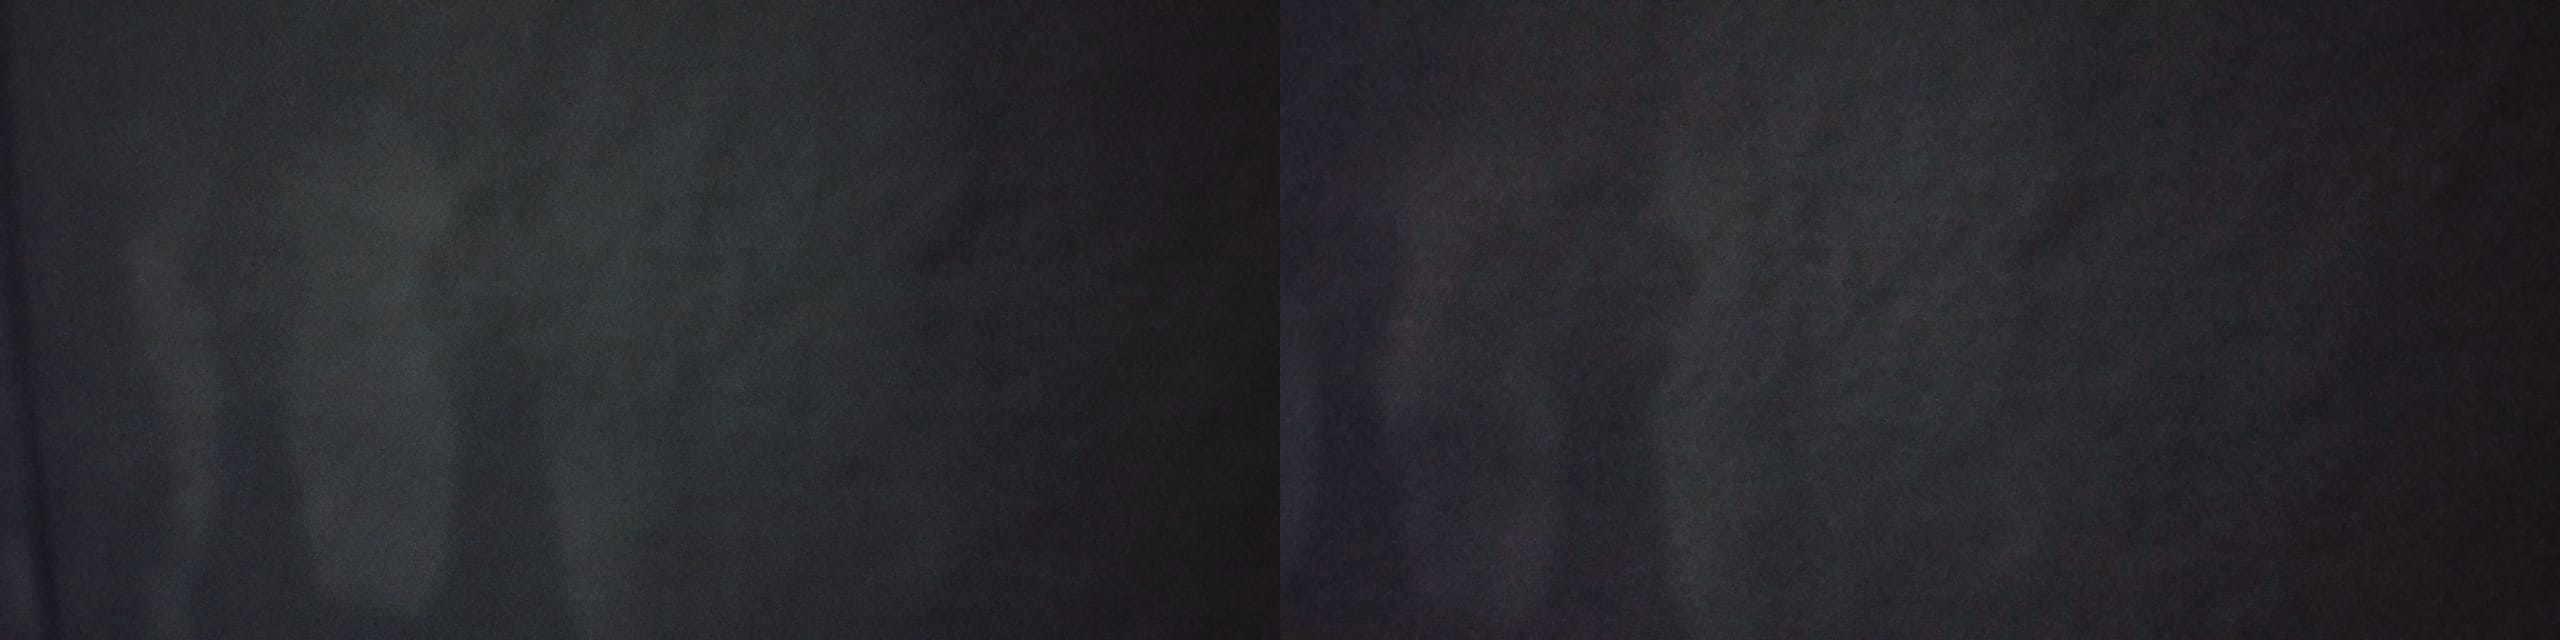

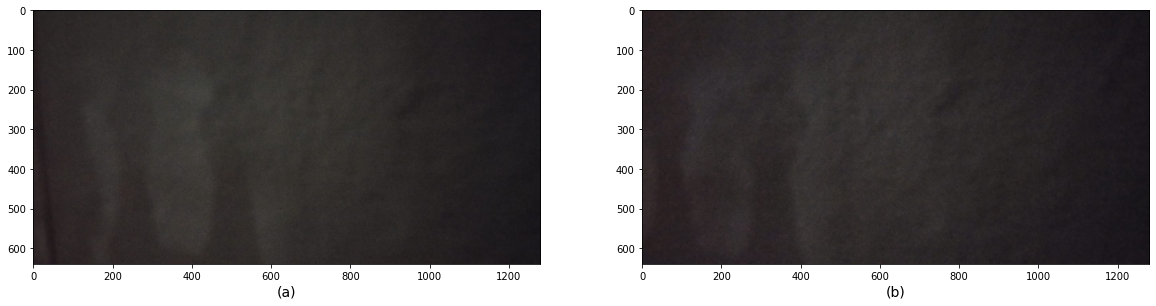

In [25]:
image1=cv2.imread('/content/a.jpeg')
image2=cv2.imread('/content/b.jpeg')

image1_gray=cv2.cvtColor(image1,cv2.COLOR_BGR2GRAY)
image2_gray=cv2.cvtColor(image2,cv2.COLOR_BGR2GRAY)

image1=cv2.cvtColor(image1,cv2.COLOR_BGR2RGB)
image2=cv2.cvtColor(image2,cv2.COLOR_BGR2RGB)

# find the keypoints and descriptors with ORB
orb = cv2.ORB_create()

kp1, des1 = orb.detectAndCompute(image1_gray,None)
kp2, des2 = orb.detectAndCompute(image2_gray,None)

# Initiate Sift detector
sift =cv2.xfeatures2d.SIFT_create()
kp1, des1 = sift.detectAndCompute(image1_gray,None)
kp2, des2 = sift.detectAndCompute(image2_gray,None)

# display the keypoints and features detected on both images
fig, (ax1,ax2) = plt.subplots(nrows=1, ncols=2, figsize=(20,8), constrained_layout=False)
ax1.imshow(cv2.drawKeypoints(image1,kp1,None,color=(0,255,0)))
ax1.set_xlabel("(a)", fontsize=14)
ax2.imshow(cv2.drawKeypoints(image2,kp2,None,color=(0,255,0)))
ax2.set_xlabel("(b)", fontsize=14)

match = cv2.BFMatcher()
matches = match.knnMatch(des1,des2,k=2)
#matches = sir are u saying something like the neighbours of a pixel in img1 gets compared with the neighbours of all pixels in second img
print(len(matches))
good = []
for m,n in matches:
    if m.distance < 0.7*n.distance:
        good.append(m)

draw_params = dict(matchColor=(0,255,0),
                       singlePointColor=None,
                       flags=2)

img3 = cv2.drawMatches(image1,kp1,image2,kp2,good,None,**draw_params)
# plt.imshow(img3)
cv2_imshow(img3)
#so is it like pts a, b matched to c, d. so m.distance = AB and n.distance = cd

**Panorama function** which takes image path as argument and outputs panorama

In [0]:
def trim(frame):
          #crop top
          if not np.sum(frame[0]):
              return trim(frame[1:])
          #crop bottom
          if not np.sum(frame[-1]):
              return trim(frame[:-2])
          #crop left
          if not np.sum(frame[:,0]):
              return trim(frame[:,1:])
          #crop right
          if not np.sum(frame[:,-1]):
              return trim(frame[:,:-2])
          return frame

def panorama(path_right,path_left):

      image1=cv2.imread(path_right)
      image2=cv2.imread(path_left)

      image1_gray=cv2.cvtColor(image1,cv2.COLOR_BGR2GRAY)
      image2_gray=cv2.cvtColor(image2,cv2.COLOR_BGR2GRAY)

      image1=cv2.cvtColor(image1,cv2.COLOR_BGR2RGB)
      image2=cv2.cvtColor(image2,cv2.COLOR_BGR2RGB)

      # Initiate Sift detector
      sift =cv2.xfeatures2d.SIFT_create()
      kp1, des1 = sift.detectAndCompute(image1_gray,None)
      kp2, des2 = sift.detectAndCompute(image2_gray,None)

      # display the keypoints and features detected on both images
      #fig, (ax1,ax2) = plt.subplots(nrows=1, ncols=2, figsize=(20,8), constrained_layout=False)
      #ax1.imshow(cv2.drawKeypoints(image1_gray,kp1,None,color=(0,255,0)))
      #ax1.set_xlabel("(a)", fontsize=14)
      #ax2.imshow(cv2.drawKeypoints(image2_gray,kp2,None,color=(0,255,0)))
      #ax2.set_xlabel("(b)", fontsize=14)

      match = cv2.BFMatcher()
      matches = match.knnMatch(des1,des2,k=2)

      good = []
      for m,n in matches:
          if m.distance < 0.9*n.distance:
              good.append(m)

      draw_params = dict(matchColor=(0,255,0),
                            singlePointColor=None,
                            flags=2)

      img3 = cv2.drawMatches(image1_gray,kp1,image2_gray,kp2,good,None,**draw_params)
      #plt.imshow(img3)

      MIN_MATCH_COUNT = 8
      if len(good) > MIN_MATCH_COUNT:
          src_pts = np.float32([ kp1[m.queryIdx].pt for m in good ]).reshape(-1,1,2)
          dst_pts = np.float32([ kp2[m.trainIdx].pt for m in good ]).reshape(-1,1,2)

          M, mask = cv2.findHomography(src_pts, dst_pts, cv2.RANSAC, 5.0)

          h,w = image2_gray.shape
          pts = np.float32([ [0,0],[0,h-1],[w-1,h-1],[w-1,0] ]).reshape(-1,1,2)
          dst = cv2.perspectiveTransform(pts, M)
          #img2 = cv2.polylines(image2,[np.int32(dst)],True,255,3, cv2.LINE_AA)

          #plt.imshow(img2)
          dst = cv2.warpPerspective(image1,M,(image2.shape[1] + image1.shape[1], image2.shape[0]+ image1.shape[0]))
          dst[0:image2.shape[0],0:image2.shape[1]] = image2
          #plt.imshow(dst)


          #plt.imshow(trim(dst))
          #cv2.imsave("original_image_stitched_crop.jpg", trim(dst))
          return(trim(dst))
      else:
          print("Not enought matches are found - %d/%d", (len(good)/MIN_MATCH_COUNT))

     

In [0]:
root='drive/My Drive/CVIT Day 4/Panorama/Eg4/'
images=os.listdir(root)
save_path='drive/My Drive/CVIT Day 4/Panorama/Outputs/Eg4/'
for i in range (len(images)-1):
  path_right=root+images[i+1] 
  if i==0:
    path_left=root+images[i]
  else:
    path_left=save_image
  img_new=panorama(path_right,path_left)
  save_image=save_path+images[i+1][:-4]+"output.png"
  cv2.imwrite(save_image, cv2.cvtColor(img_new, cv2.COLOR_RGB2BGR)) 

In [90]:
  img_new=panorama("/content/img2_6.png","/content/output4.png")
  save_path='/content/'
  save_image=save_path+"output3.png"
  cv2.imwrite(save_image, cv2.cvtColor(img_new, cv2.COLOR_RGB2BGR)) 

True

In [8]:
  img_new=panorama("/content/dark_right.jpeg","/content/dark_left.jpeg")
  save_path='/content/'
  save_image=save_path+"outputWall.png"
  cv2.imwrite(save_image, cv2.cvtColor(img_new, cv2.COLOR_RGB2BGR)) 

True

The above panorama function isnt working for eg4 "this week" thing since the overlap regions are very less and also their intensities/pixels differ significantly.

**AFTERNOON SESSION**

**Task 1)**<br> Map the book in the image to a rectangular window of width=400 and height=400.
Function for homography- cv2.findHomography(pts_src, pts_dst)


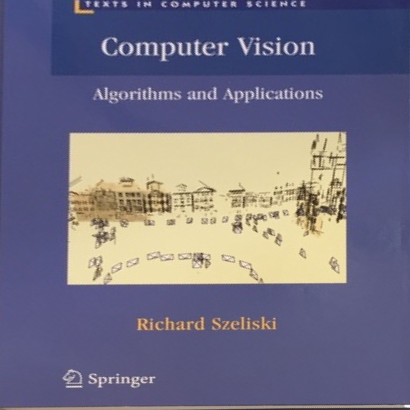

In [104]:
I=cv2.imread("/content/book1.jpg")
ht,wdt=400,400

pts_dst=np.array([[0,0],[400,0],[400,400],[0,400]])
pts_src=np.load("/content/Points.npy")

M,stat=cv2.findHomography(pts_src,pts_dst)
I1=cv2.warpPerspective(I,M,(410,410))
cv2_imshow(I1)


**Task2)**<br> Align the book in the book1.jpg to the book in the book2.jpg

pts_src = np.array([[141, 131], [480, 159], [493, 630],[64, 601]], dtype=float)

pts_dst = np.array([[318, 256],[534, 372],[316, 670],[73, 473]], dtype=float)


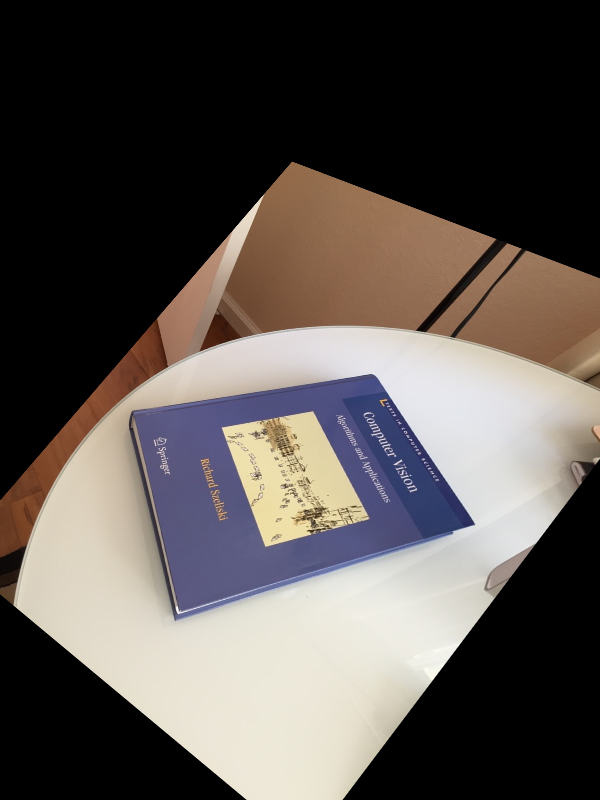

In [103]:
I=cv2.imread("/content/book1.jpg")
I1=cv2.imread("/content/book2.jpg")
ht,wdt,ch=I1.shape

pts_src = np.array([[141, 131], [480, 159], [493, 630],[64, 601]], dtype=float)
pts_dst = np.array([[318, 256],[534, 372],[316, 670],[73, 473]], dtype=float)

M,stat=cv2.findHomography(pts_src,pts_dst)
I1=cv2.warpPerspective(I,M,(wdt,ht))
cv2_imshow(I1)


**Task3)** <br>You can take tsukuba_l and tsukuba_r images from the drive link and use 

cv2.StereoBM_create(numDisparities=16, blockSize=15) to get disparity map

After getting the disparity map try to remove objects from the image whose disparity is  less  than a  particular threshold say 120.


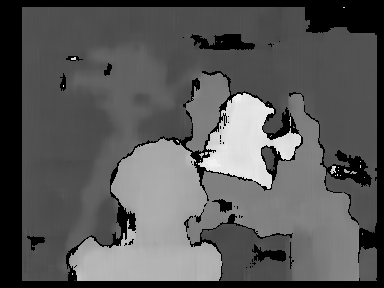

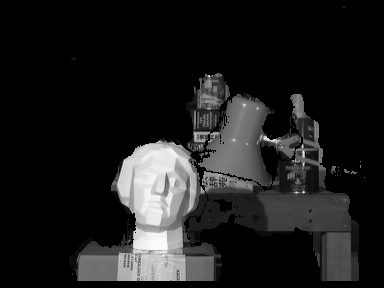

In [224]:

def cut(disparity,image,threshold):
  for i in range(image.shape[0]):
    for j in range(image.shape[1]):
      if(disparity[i][j]<threshold):
        image[i][j]=0
  return image

I1=cv2.imread("/content/tsukuba_l.png",cv2.IMREAD_GRAYSCALE)
I2=cv2.imread("/content/tsukuba_r.png",cv2.IMREAD_GRAYSCALE)

stereo = cv2.StereoBM_create(numDisparities=16,blockSize=15)
disparity=stereo.compute(I1,I2)

ret=cut(disparity,I1,120)
cv2_imshow(ret)

**Task4)**<br> You can take the view0.png and view1.png from the link and perform the SSD based patch matching to get the disparity map. (Take this as homework and submit it in you git repository with a report of different cost metrics).

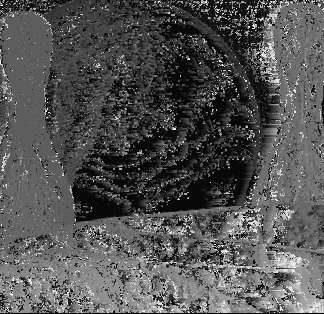

In [16]:
I1=cv2.imread("/content/view0.png",cv2.IMREAD_GRAYSCALE)
I2=cv2.imread("/content/view1.png",cv2.IMREAD_GRAYSCALE)

ssd = []
ht,wdt=I1.shape
disparity=np.zeros([I2.shape[0],I2.shape[1]])
for item in range(I1.shape[0]):
    temp=[]
    for lol in range(I1.shape[1]):
      temp.append([0,0])
    ssd.append(temp)

# print(I1[0:3,0:1])
# print(I1)
threshold=30
# window=3/2
for i in range(40,len(I1)-1):
  for j in range(threshold,len(I1[0])-1):
    temp2=10000000000000
    for k in range(1,threshold-1):
      temp1=np.sum(np.square(I1[i-1:i+1,j-1:j+1]-I2[i-1:i+1,j-k:j-k+2])) 
      if(temp1<temp2):
        ssd[i][j]=k
        temp2=temp1
    disparity[i][j]=abs(ssd[i][j])*(255/threshold)

cv2_imshow(np.hstack([disparity[40:wdt,30:ht]]))
# for i in range(len(ssd)):
  # for j in range(len(ssd[0])):
    # print(disparity[i][j])